In [1]:
from numpy import *
from matplotlib import use
#use("Qt5Agg")
import matplotlib.pyplot as plt

## Motion in the Gravitational Field of Two Bodies

Can be described as an 4D-IVP. The state space vector is interpreted as follows:

$x = (x_1, x_2, x_3, x_4)=$(position in x-axis, position in y-axis, speed in x-axis, speed in y-axis)

The systems parameters are the bodies' mass ratios

In [2]:
m1 = 1/82.45
m2 = 1 - m1

The ODE system's function reads, with switched arguments, i.e. $f(t,x)$:

In [3]:
# the order: t bevore x is required by the built in solvers
def f(t, x):
    """Motion in the gravitational Field of two bodies"""
    
    # extract the state spaced for better readability
    x_pos, y_pos, x_vel, y_vel = x 
    
    # evaluate the right hand side equation that should equal the x derivatives
    dx_pos = x_vel 
    dy_pos = y_vel 
    dx_vel = (x_pos + 2*y_vel - m2*(x_pos + m1)/((x_pos + m1)**2 + y_pos**2)**(3/2)
                              - m1*(x_pos - m2)/((x_pos - m2)**2 + y_pos**2)**(3/2))
    dy_vel = (y_pos - 2*x_vel - m2*       y_pos/((x_pos + m1)**2 + y_pos**2)**(3/2)
                              - m1*       y_pos/((x_pos - m2)**2 + y_pos**2)**(3/2))
    
    # return the evaluated data in order of their underived state space x
    return [dx_pos, dy_pos, dx_vel, dy_vel]

The initial condition reads

$\begin{align*} 
    x(0) &= 1.2\;, & y(0) &= 0 \;,\\
    x'(0) &= 0\;, & y'(0) &= -1.04935750983\;.
\end{align*}$

In [4]:
x_start = [1.2, 0., 0., -1.04935750983]
t_start = 0

Starting from the initial time point $\mathring{t} = 0$, we would like to predict the gravitational trajectory until $T = 6.19217$.

In [5]:
T = 6.19217

#### Solving the ODE System with a Built-In-Solver

Import the solver and set it up

In [6]:
from scipy.integrate import solve_ivp

Provide lists for the approximation data $(t_n , x_n)$

In [7]:
Tn = []
Xn = []

Integrate for a given step size $h$ until the intervalls end point $T$ is reached.

In [11]:
h = 0.5

sol = solve_ivp(f, [t_start, T], x_start, method="RK45", rtol=1e-8)

Tn = sol.t
Xn = sol.y.T #.T transposes solution in report.y


In [12]:
Xn = array(Xn)

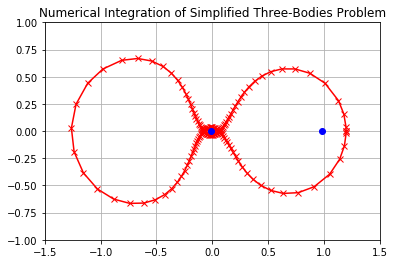

In [13]:
fig, ax = plt.subplots()
ax.plot(Xn[:,0], Xn[:,1], "-", color='red')
ax.plot(Xn[:, 0], Xn[:, 1], "x", color="red")
ax.plot(-m1, 0, "o", color='blue')
ax.plot(m2, 0, "o", color='blue')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1, 1])
ax.grid(True)
plt.title("Numerical Integration of Simplified Three-Bodies Problem")
plt.show()

In [16]:
print(len(Tn))

140
